In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
movies=pd.read_csv('dataset/movies.csv')
movies.head()

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick
1,2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena
2,3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley
3,4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett
4,5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS


In [3]:
movies.shape

(999999, 17)

In [4]:
movies.dtypes

MovieID                   int64
Title                    object
Genre                    object
ReleaseYear               int64
ReleaseDate              object
Country                  object
BudgetUSD               float64
US_BoxOfficeUSD         float64
Global_BoxOfficeUSD     float64
Opening_Day_SalesUSD    float64
One_Week_SalesUSD       float64
IMDbRating              float64
RottenTomatoesScore       int64
NumVotesIMDb              int64
NumVotesRT                int64
Director                 object
LeadActor                object
dtype: object

In [5]:
movies.columns

Index(['MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country',
       'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD',
       'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating',
       'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director',
       'LeadActor'],
      dtype='object')

In [6]:
# Converting ReleaseDate to datetime
movies['ReleaseDate']=pd.to_datetime(movies['ReleaseDate'], errors='coerce')

C:\Users\nizom\AppData\Local\Temp\ipykernel_18680\1870474262.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  movies['ReleaseDate']=pd.to_datetime(movies['ReleaseDate'], errors='coerce')


### No Duplicates

In [7]:
movies.duplicated().sum()

np.int64(0)

### No Missing Values

In [8]:
movies.isnull().sum()

MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT              0
Director                0
LeadActor               0
dtype: int64

In [9]:
### Extracting month and decade

movies['ReleaseMonth']=movies['ReleaseDate'].dt.month
movies['ReleaseDecade']=(movies['ReleaseYear']//10)*10

movies[["Title", "ReleaseYear", "ReleaseMonth", "ReleaseDecade"]].head()

,Title,ReleaseYear,ReleaseMonth,ReleaseDecade
0,Might toward capital,2003,9,2000
1,He however experience,1988,2,1980
2,Star responsibility politics,1971,11,1970
3,Exactly live,1998,8,1990
4,Focus improve especially,2021,12,2020


## ROI (Return on Investment)

In [10]:
#Calculating ROI
movies['ROI']=round(movies['Global_BoxOfficeUSD']/movies['BudgetUSD'],2)

movies[["Title", "BudgetUSD", "Global_BoxOfficeUSD", "ROI"]].head()

,Title,BudgetUSD,Global_BoxOfficeUSD,ROI
0,Might toward capital,6577427.79,15472035.66,2.35
1,He however experience,1883810.10,3637731.12,1.93
2,Star responsibility politics,2468079.29,7165111.24,2.90
3,Exactly live,1447311.46,4373820.26,3.02
4,Focus improve especially,900915.86,3113017.38,3.46


### Top 10 Movies by ROI and Rating

In [11]:
top_roi=movies.sort_values(['ROI','IMDbRating'] , ascending=False).head(10)
top_roi[['Title','ReleaseDate','Country','IMDbRating','Director','LeadActor','ROI']]

,Title,ReleaseDate,Country,IMDbRating,Director,LeadActor,ROI
24175,Seek bed,1987-12-01,USA,10.0,Mr. Drew Clark Jr.,Joel Hunt,5.0
27319,Professional behind suffer,2015-08-02,USA,10.0,Shannon Ross,Dennis Rogers,5.0
41638,Style skin,2004-06-21,USA,10.0,Mrs. Hannah Campbell DDS,Dawn Blake,5.0
73004,Mother crime job,2012-10-28,USA,10.0,Jerry Owens,Joel Hunt,5.0
115214,Care successful,1960-03-06,China,10.0,Mr. Jorge Anderson,Anna Vasquez,5.0
252276,Evening another child,2015-08-17,USA,10.0,Caitlin Brewer,Stephanie Ferrell,5.0
324052,Wrong receive expert,1998-05-29,South Korea,10.0,Barbara Torres,Lynn Pierce,5.0
385999,Option culture,1999-10-09,USA,10.0,Donna Wagner,Jessica Scott,5.0
400695,A hotel stand,1992-01-04,USA,10.0,Darrell Carlson,Daniel Callahan,5.0
457515,Data perform people exactly,1963-01-24,Japan,10.0,Michael Manning,Cody Peters,5.0


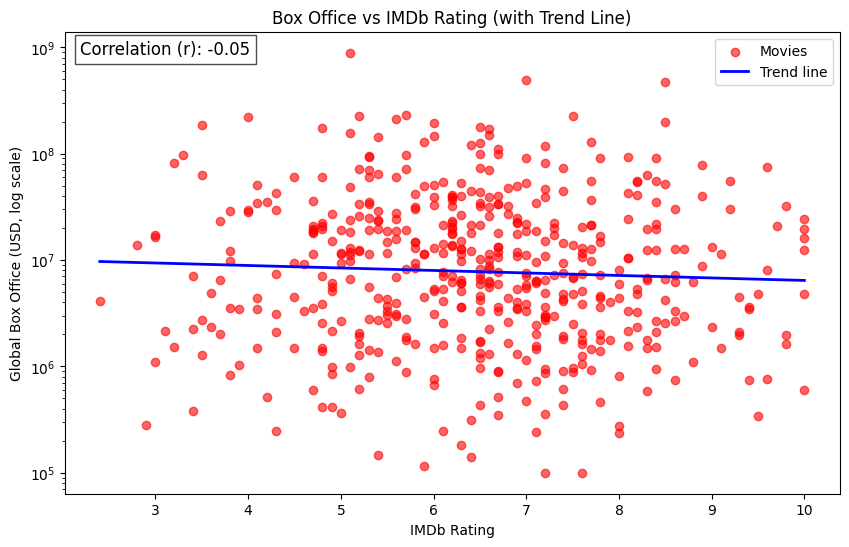

In [12]:
sample_df=movies.sample(500, random_state=42)

x = sample_df["IMDbRating"]
y = sample_df["Global_BoxOfficeUSD"]

# Pearson correlation
corr, p_value = pearsonr(x, y)

# Regression line (log-transformed y)
m, b = np.polyfit(x, np.log10(y+1), 1)

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.6, c="red", label="Movies")
plt.yscale("log")
plt.plot(sorted(x), 10**(m*np.array(sorted(x)) + b), color="blue", linewidth=2, label="Trend line")

plt.xlabel("IMDb Rating")
plt.ylabel("Global Box Office (USD, log scale)")
plt.title("Box Office vs IMDb Rating (with Trend Line)")
plt.legend()

# Correlation 
plt.text(
    0.02, 0.95,                          
    f"Correlation (r): {corr:.2f}", 
    transform=plt.gca().transAxes,     
    fontsize=12, 
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="black")
)

plt.show()

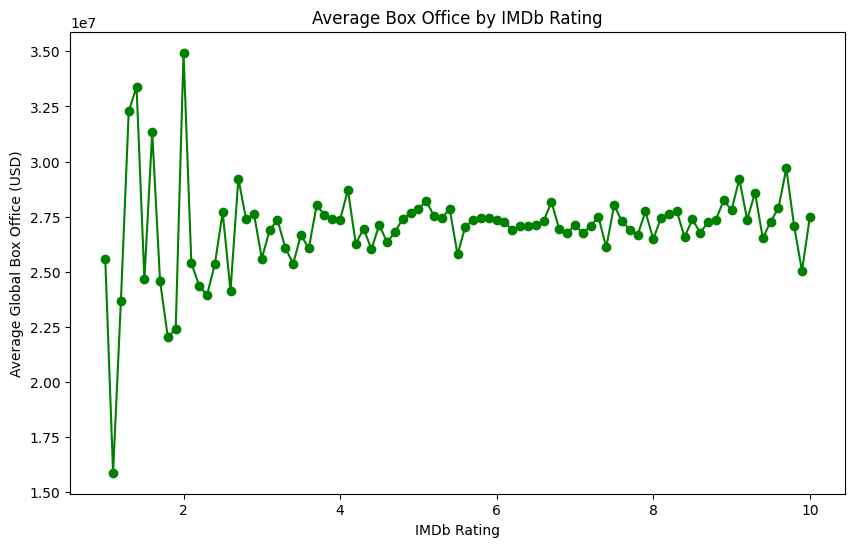

In [13]:
rating_avg = movies.groupby("IMDbRating")["Global_BoxOfficeUSD"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(rating_avg["IMDbRating"], rating_avg["Global_BoxOfficeUSD"], marker="o", color="green")
plt.xlabel("IMDb Rating")
plt.ylabel("Average Global Box Office (USD)")
plt.title("Average Box Office by IMDb Rating")
plt.show()


## Movies Released Per Year

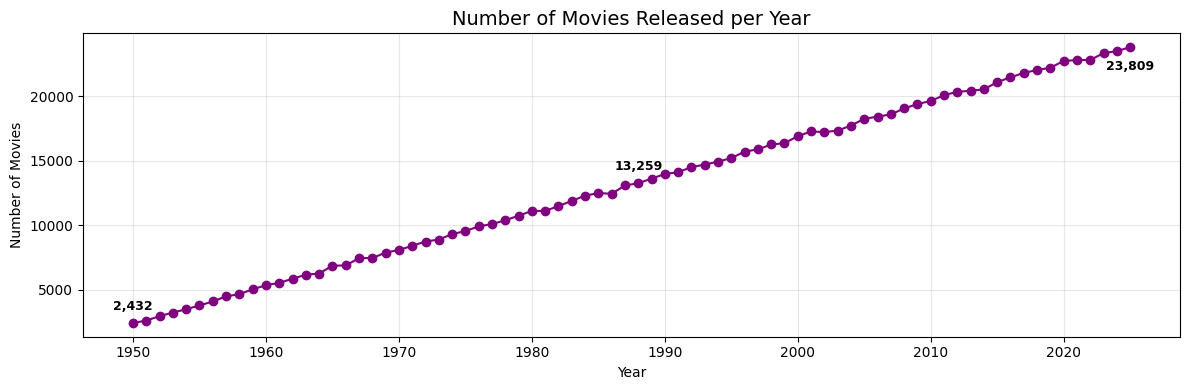

In [14]:
movies_per_year = movies.groupby('ReleaseYear')['MovieID'].count()

plt.figure(figsize=(12,4))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='purple')

plt.title("Number of Movies Released per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Picking indices
first_idx = 0
middle_idx = len(movies_per_year) // 2
last_idx = -1

# Annotation
for idx in [first_idx, middle_idx]:
    x = movies_per_year.index[idx]
    y = movies_per_year.values[idx]
    plt.text(x, y+800, f"{y:,}", ha="center", va="bottom", fontsize=9, fontweight="bold", color="black")

x_last = movies_per_year.index[last_idx]
y_last = movies_per_year.values[last_idx]
plt.text(x_last, y_last-1_000, f"{y_last:,}", ha="center", va="top", fontsize=9, fontweight="bold", color="black")

plt.show()


## Average Box Office by Release Month

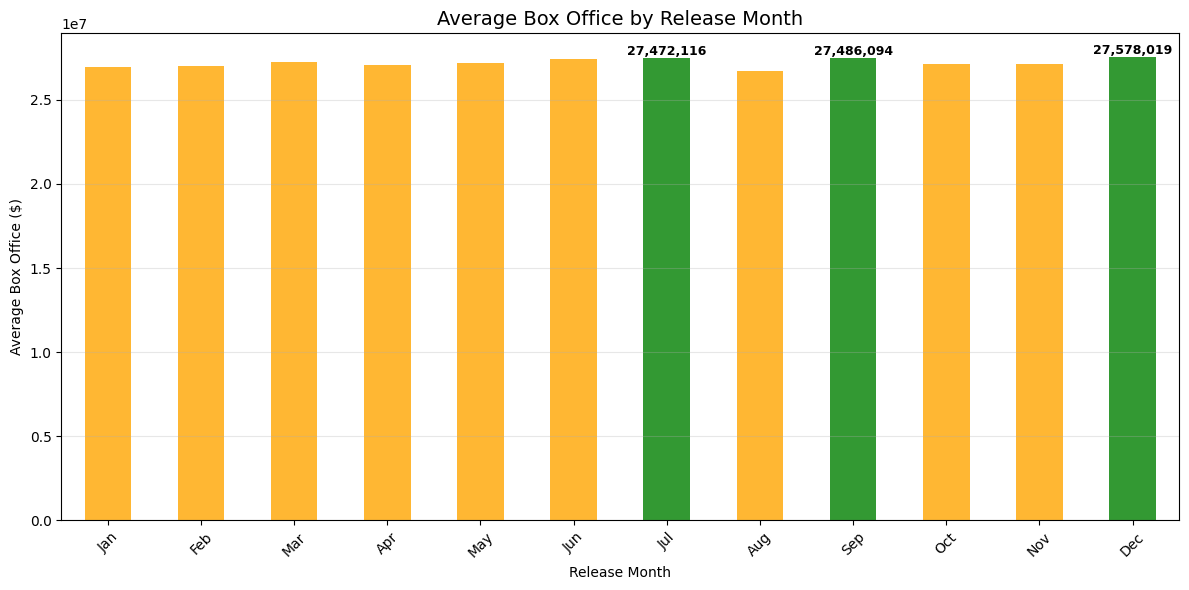

In [15]:
import calendar

avg_boxoffice_month = movies.groupby("ReleaseMonth")["Global_BoxOfficeUSD"].mean()

# Replacing month numbers with month names
avg_boxoffice_month.index = [calendar.month_abbr[m] for m in avg_boxoffice_month.index]

# Finding top 3 months
top3 = avg_boxoffice_month.sort_values(ascending=False).head(3).index

# Setting colors: highlighting top 3 in green, others in orange
colors = ["green" if month in top3 else "orange" for month in avg_boxoffice_month.index]

plt.figure(figsize=(12,6))
avg_boxoffice_month.plot(kind="bar", color=colors, alpha=0.8)

plt.title("Average Box Office by Release Month", fontsize=14)
plt.xlabel("Release Month")
plt.ylabel("Average Box Office ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)

# Finding top 3 months by value
top3_idx = avg_boxoffice_month.nlargest(3).index

# Annotating only top 3 bars
for i, val in enumerate(avg_boxoffice_month):
    if avg_boxoffice_month.index[i] in top3_idx:
    
        plt.text(i, val, f"{val:,.0f}",
                 ha="center", va="bottom", fontsize=9, weight="bold", color="black")


plt.tight_layout()
plt.show()

## Ratings vs Box Office by Genre

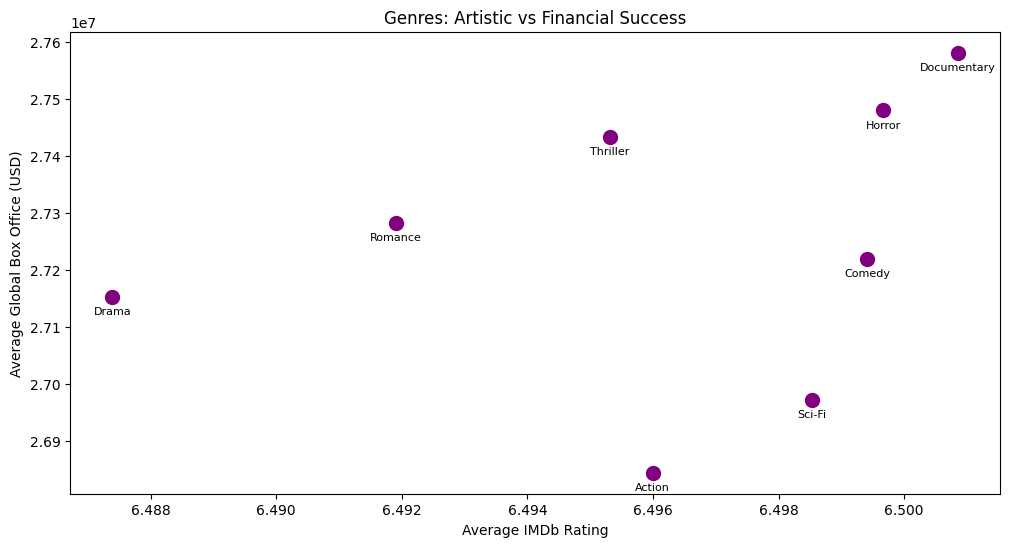

In [25]:
genre_stats = movies.groupby("Genre").agg({
    "IMDbRating": "mean",
    "Global_BoxOfficeUSD": "mean"
})

plt.figure(figsize=(12,6))
plt.scatter(genre_stats["IMDbRating"], genre_stats["Global_BoxOfficeUSD"], s=100, color="purple")

for genre in genre_stats.index:
    plt.text(genre_stats.loc[genre,"IMDbRating"], 
             genre_stats.loc[genre,"Global_BoxOfficeUSD"]- 17_000, 
             genre, fontsize=8, ha="center", va="top")

plt.xlabel("Average IMDb Rating")
plt.ylabel("Average Global Box Office (USD)")
plt.title("Genres: Artistic vs Financial Success")
plt.show()


## Country Analysis

C:\Users\nizom\AppData\Local\Temp\ipykernel_18680\263444080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis")


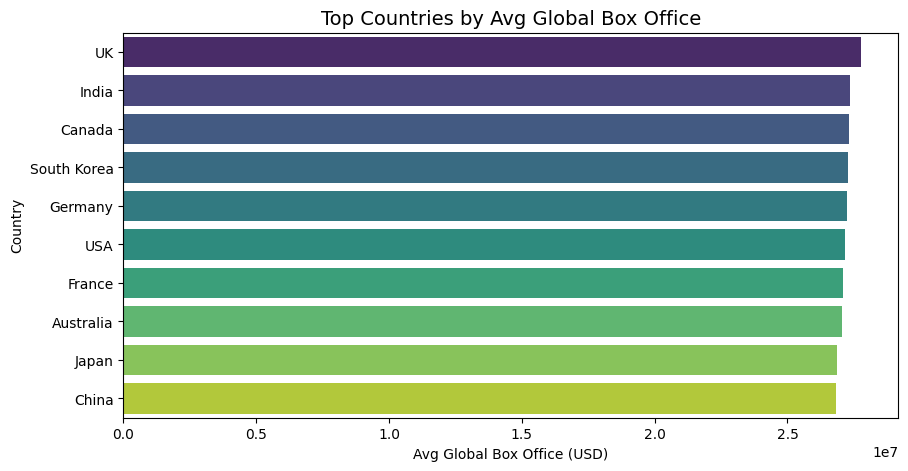

In [20]:
country_revenue = movies.groupby('Country')['Global_BoxOfficeUSD'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis")
plt.title("Top Countries by Avg Global Box Office", fontsize=14)
plt.xlabel("Avg Global Box Office (USD)")
plt.show()

In [24]:
# Opening vs First Week Sales
movies['Momentum'] = movies['One_Week_SalesUSD'] / movies['Opening_Day_SalesUSD']
top_momentum = movies[['Title','Momentum']].sort_values(by='Momentum', ascending=False).head(10)
print("Top 10 Movies by Momentum:\n", top_momentum)

Top 10 Movies by Momentum:
                            Title  Momentum
131003               Reduce rule         6
821170  Long government politics         6
592511  Class number natural old         6
296012           Themselves line         6
308954             Successful TV         6
816845        Hand story picture         6
851102                Off likely         6
443018               Future task         6
477853                     Check         6
264496           Join each white         6


C:\Users\nizom\AppData\Local\Temp\ipykernel_18680\188090678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_success.values, y=director_success.index, palette="mako")
C:\Users\nizom\AppData\Local\Temp\ipykernel_18680\188090678.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_success.values, y=actor_success.index, palette="rocket")


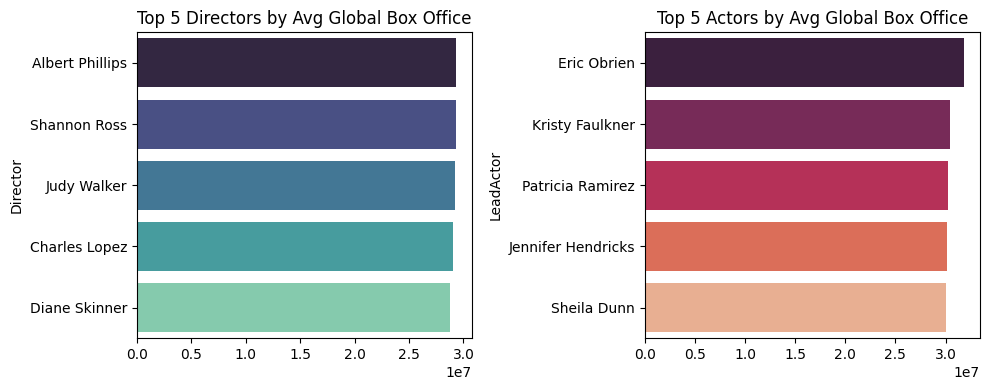

In [23]:
# Talent Impact
director_success = movies.groupby('Director')['Global_BoxOfficeUSD'].mean().sort_values(ascending=False).head(5)
actor_success = movies.groupby('LeadActor')['Global_BoxOfficeUSD'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=director_success.values, y=director_success.index, palette="mako")
plt.title("Top 5 Directors by Avg Global Box Office")

plt.subplot(1,2,2)
sns.barplot(x=actor_success.values, y=actor_success.index, palette="rocket")
plt.title("Top 5 Actors by Avg Global Box Office")
plt.tight_layout()
plt.show()
